# Amazon Reviews Analysis

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import math
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore",category=UserWarning)
sns.set_style("whitegrid") 
%matplotlib inline 
np.random.seed(7) 

csv = "amazon.csv"
df = pd.read_csv(csv)
df.head(2)

,id,asins,brand,categories,colors,dateAdded,dateUpdated,dimension,ean,keys,...,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username,sizes,upc,weight
0,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",NaN,2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,169 mm x 117 mm x 9.1 mm,NaN,kindlepaperwhite/b00qjdu3ky,...,5.0,https://www.amazon.com/Kindle-Paperwhite-High-...,I initially had trouble deciding between the p...,"Paperwhite voyage, no regrets!",NaN,NaN,Cristina M,NaN,NaN,205 grams
1,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",NaN,2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,169 mm x 117 mm x 9.1 mm,NaN,kindlepaperwhite/b00qjdu3ky,...,5.0,https://www.amazon.com/Kindle-Paperwhite-High-...,Allow me to preface this with a little history...,One Simply Could Not Ask For More,NaN,NaN,Ricky,NaN,NaN,205 grams


In [5]:
data = df.copy()
data.describe()

,ean,reviews.numHelpful,reviews.rating,reviews.userCity,reviews.userProvince,sizes,upc
count,8.980000e+02,900.000000,1177.000000,0.0,0.0,0.0,8.980000e+02
mean,8.443135e+11,83.584444,4.359388,NaN,NaN,NaN,8.443135e+11
std,3.416444e+09,197.150238,1.021445,NaN,NaN,NaN,3.416444e+09
min,8.416670e+11,0.000000,1.000000,NaN,NaN,NaN,8.416670e+11
25%,8.416670e+11,0.000000,4.000000,NaN,NaN,NaN,8.416670e+11
50%,8.416670e+11,0.000000,5.000000,NaN,NaN,NaN,8.416670e+11
75%,8.487190e+11,34.000000,5.000000,NaN,NaN,NaN,8.487190e+11
max,8.487190e+11,997.000000,5.000000,NaN,NaN,NaN,8.487190e+11


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1597 entries, 0 to 1596
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    1597 non-null   object 
 1   asins                 1597 non-null   object 
 2   brand                 1597 non-null   object 
 3   categories            1597 non-null   object 
 4   colors                774 non-null    object 
 5   dateAdded             1597 non-null   object 
 6   dateUpdated           1597 non-null   object 
 7   dimension             565 non-null    object 
 8   ean                   898 non-null    float64
 9   keys                  1597 non-null   object 
 10  manufacturer          965 non-null    object 
 11  manufacturerNumber    902 non-null    object 
 12  name                  1597 non-null   object 
 13  prices                1597 non-null   object 
 14  reviews.date          1217 non-null   object 
 15  reviews.doRecommend  

In [7]:
data["asins"].unique()

array(['B00QJDU3KY', 'B002Y27P3M', 'B00DU15MU4', 'B01LW1MS9C',
       'B01FWSVGQQ', 'B00DOPNLJ0', 'B00NO8LX7E', 'B00LWHUAF0',
       'B00KDRQEYQ', 'B00OQVZDJM', 'B00QJDVBFU', 'B00VKLBU3Y',
       'B010BWYP20', 'B00VKM5NFY', 'B01KIOU4EO', 'B0117U8JSG',
       'B01A08ECQY', 'B01J2G4VBG', 'B00QJDS7I4', 'B00U879XZ8',
       'B010EK1GOE', 'B00LWHUB9A', 'B00ZS0G0PG', 'B01A08E70K',
       'B00PD81ETU', 'B06XDD27LJ', 'B00CX5P8FC', 'B07194GPJV',
       'B008GG93YE,B00LWHUBPO,B0051QYGXA', 'B071NMTDHR', 'B0117U82EM',
       'B0711C7WL2', 'B01M3ULMWP', 'B00LWHU9D8', 'B0716JZKLT',
       'B01BRWH8G8', 'B01M4NRFXX', 'B01KVZDFD2', 'B01M4NU4OM',
       'B008GGCAVM,B00DOPNMVM', 'B00KSR13CE', 'B01M71HRMY', 'B01K8B8YA8',
       'B010BWYDYA', 'B01KIOU214', 'B00DOPNK14',
       'B00DOPNO4M,B00BWYQ9YE,B00CYQPMJC,B00CUU1CGY,B00BWYRF7E,B00CYQP3AK',
       'B01BH83OOM', 'B00K5W9WZW', 'B01E9AHU8Q', 'B01HC1S9HU',
       'B00HX0SRXW', 'B00LORGAG6', 'B00NO8JJZW'], dtype=object)

In [8]:
asins_unique = len(data["asins"].unique())
print("Number of Unique ASINs: " + str(asins_unique))

Number of Unique ASINs: 54


**Visualizing the distributions of numerical variables:**

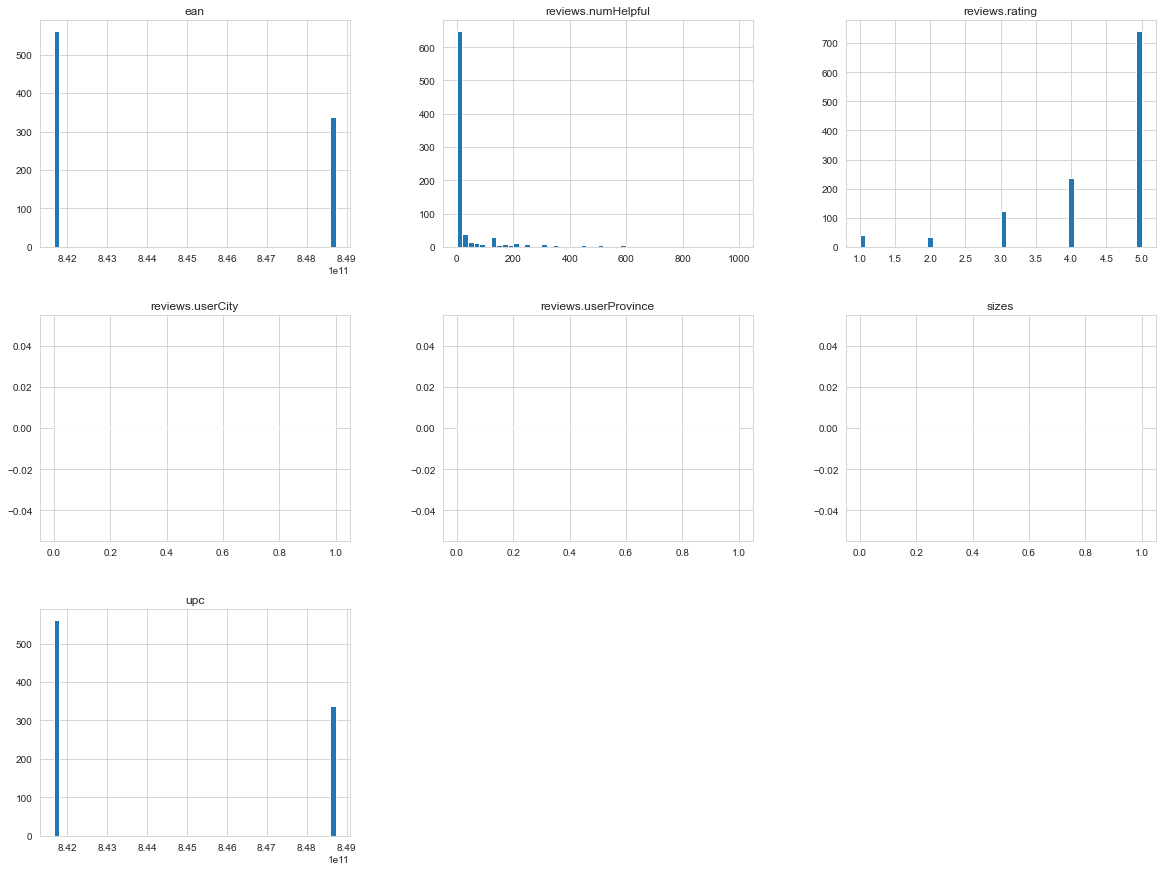

In [9]:
data.hist(bins=50, figsize=(20,15)) # builds histogram and set the number of bins and fig size (width, height)
plt.show()

# 3 Split into Train/Test

In [10]:
from sklearn.model_selection import StratifiedShuffleSplit
print("Before {}".format(len(data)))
dataAfter = data.dropna(subset=["reviews.rating"]) # removes all NAN in reviews.rating
print("After {}".format(len(dataAfter)))
dataAfter["reviews.rating"] = dataAfter["reviews.rating"].astype(int)

Before 1597
After 1177


In [11]:
split = StratifiedShuffleSplit(n_splits=5, test_size=0.2)
for train_index, test_index in split.split(dataAfter, dataAfter["reviews.rating"]): 
    strat_train = dataAfter.reindex(train_index)
    strat_test = dataAfter.reindex(test_index)

**Check to see if train/test sets were stratified proportionately in comparison to raw data.**

In [12]:
len(strat_train)

941

In [13]:
strat_train["reviews.rating"].value_counts()/len(strat_train) # value_count() counts all the values based on column

5.0    0.469713
4.0    0.143464
3.0    0.055260
2.0    0.015940
1.0    0.014878
Name: reviews.rating, dtype: float64

In [14]:
len(strat_test)

236

In [15]:
strat_test["reviews.rating"].value_counts()/len(strat_test)

5.0    0.415254
4.0    0.135593
3.0    0.059322
1.0    0.025424
2.0    0.021186
Name: reviews.rating, dtype: float64

# 4 Data Exploration (Training Set)

In [16]:
reviews = strat_train.copy()
reviews.head(2)

,id,asins,brand,categories,colors,dateAdded,dateUpdated,dimension,ean,keys,...,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username,sizes,upc,weight
981,AVpfpK8KLJeJML43BCuD,B01BH83OOM,Amazon,"Amazon Devices,Home,Smart Home & Connected Liv...",Black,2017-01-04T03:51:17Z,2017-08-13T08:31:07Z,4.8 in x 6.6 in x 3.2 in,8.416670e+11,amazontapalexaenabledportablebluetoothspeaker/...,...,5.0,http://reviews.bestbuy.com/3545/5097300/review...,My wife uses the Tap mostly to listen to music...,Wife loves the TAP.,NaN,NaN,Tapmethis,NaN,8.416670e+11,1.75 lbs
740,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 4.1 names / ASINs

In [17]:
len(reviews["name"].unique()), len(reviews["asins"].unique())

(56, 49)

In [18]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 941 entries, 981 to 65
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    658 non-null    object 
 1   asins                 658 non-null    object 
 2   brand                 658 non-null    object 
 3   categories            658 non-null    object 
 4   colors                295 non-null    object 
 5   dateAdded             658 non-null    object 
 6   dateUpdated           658 non-null    object 
 7   dimension             281 non-null    object 
 8   ean                   334 non-null    float64
 9   keys                  658 non-null    object 
 10  manufacturer          351 non-null    object 
 11  manufacturerNumber    313 non-null    object 
 12  name                  658 non-null    object 
 13  prices                658 non-null    object 
 14  reviews.date          529 non-null    object 
 15  reviews.doRecommend   

In [19]:
reviews.groupby("asins")["name"].unique()

asins
B002Y27P3M                                                                                           [Kindle Keyboard]
B008GG93YE,B00LWHUBPO,B0051QYGXA                                                                              [Kindle]
B008GGCAVM,B00DOPNMVM                                                                              [Kindle Fire HD 7"]
B00CX5P8FC                                                                                            [Amazon Fire TV]
B00DOPNK14                                                                                         [Kindle Paperwhite]
B00DOPNLJ0                                                                                      [Kindle Fire HDX 8.9"]
B00DOPNO4M,B00BWYQ9YE,B00CYQPMJC,B00CUU1CGY,B00BWYRF7E,B00CYQP3AK                                 [Kindle Fire HDX 7"]
B00DU15MU4                                                           [Certified Refurbished Amazon Fire TV (Previou...
B00KDRQEYQ                                

In [20]:
# Lets see all the different names for this product that have 2 ASINs
different_names = reviews[reviews["asins"] == "B00L9EPT8O,B01E6AO69U"]["name"].unique()
for name in different_names:
    print(name)

In [21]:
reviews[reviews["asins"] == "B00L9EPT8O,B01E6AO69U"]["name"].value_counts()

Series([], Name: name, dtype: int64)

**Confirmed our hypothesis that each ASIN can have multiple names. Therefore we should only really concern ourselves with which ASINs do well, not the product names.**

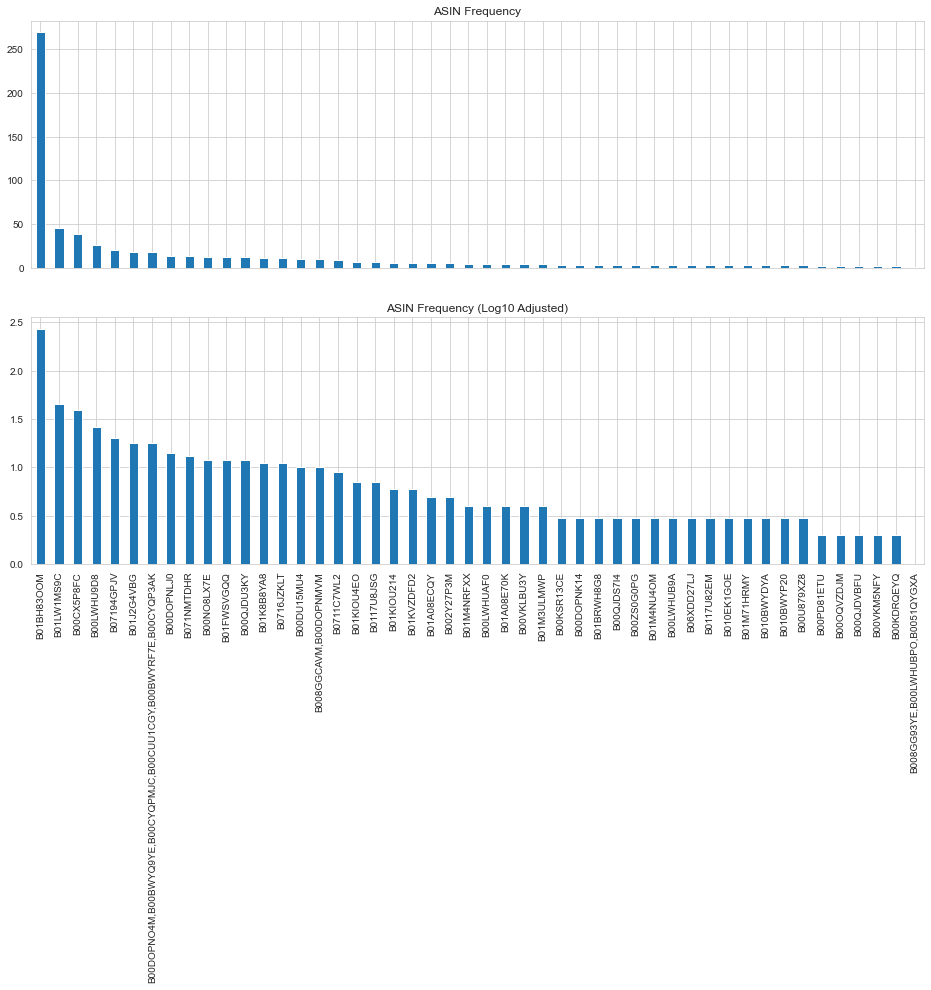

In [22]:
fig = plt.figure(figsize=(16,10))
ax1 = plt.subplot(211)
ax2 = plt.subplot(212, sharex = ax1)
reviews["asins"].value_counts().plot(kind="bar", ax=ax1, title="ASIN Frequency")
np.log10(reviews["asins"].value_counts()).plot(kind="bar", ax=ax2, title="ASIN Frequency (Log10 Adjusted)") 
plt.show()

In [23]:
# Entire training dataset average rating
reviews["reviews.rating"].mean()

4.4832826747720365

## 4.2 reviews.rating / ASINs

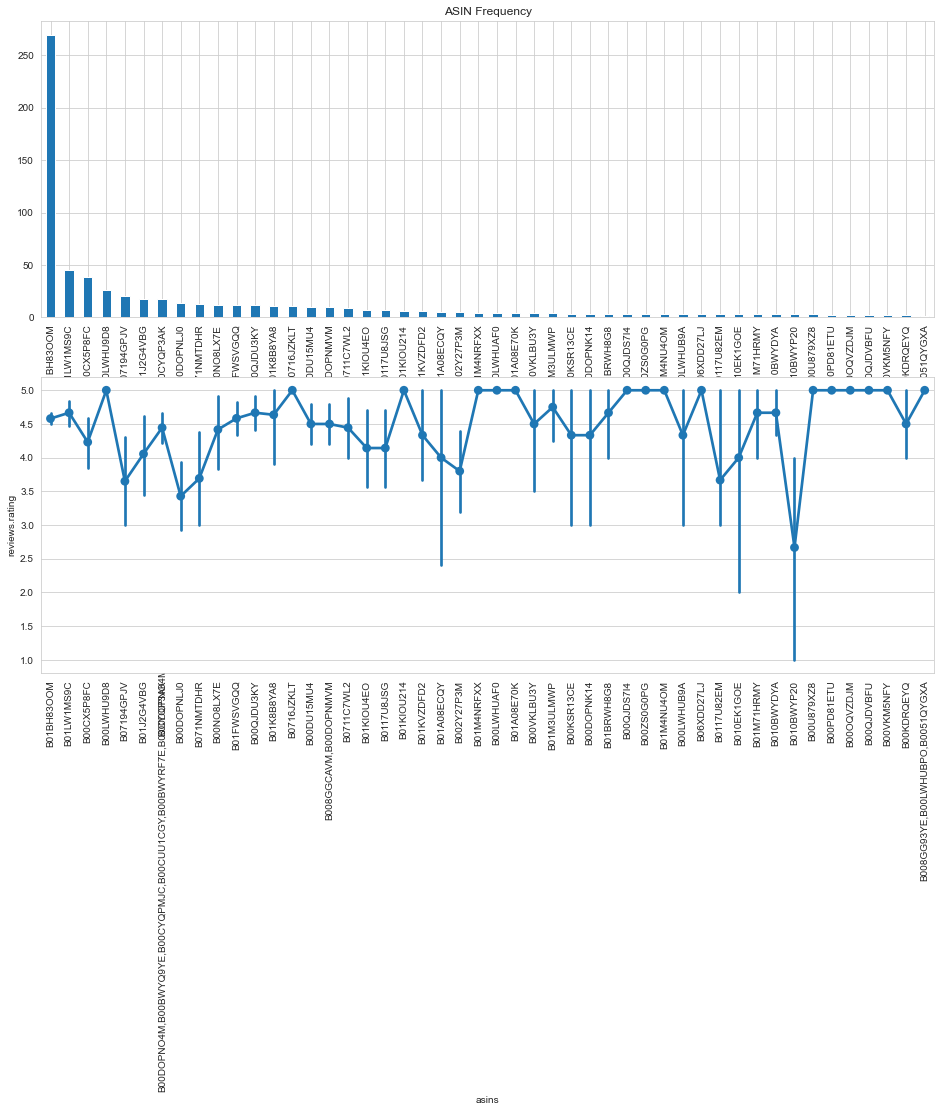

In [24]:
asins_count_ix = reviews["asins"].value_counts().index
plt.subplots(2,1,figsize=(16,12))
plt.subplot(2,1,1)
reviews["asins"].value_counts().plot(kind="bar", title="ASIN Frequency")
plt.subplot(2,1,2)
sns.pointplot(x="asins", y="reviews.rating", order=asins_count_ix, data=reviews)
plt.xticks(rotation=90)
plt.show()

## 4.3 reviews.doRecommend / ASINs

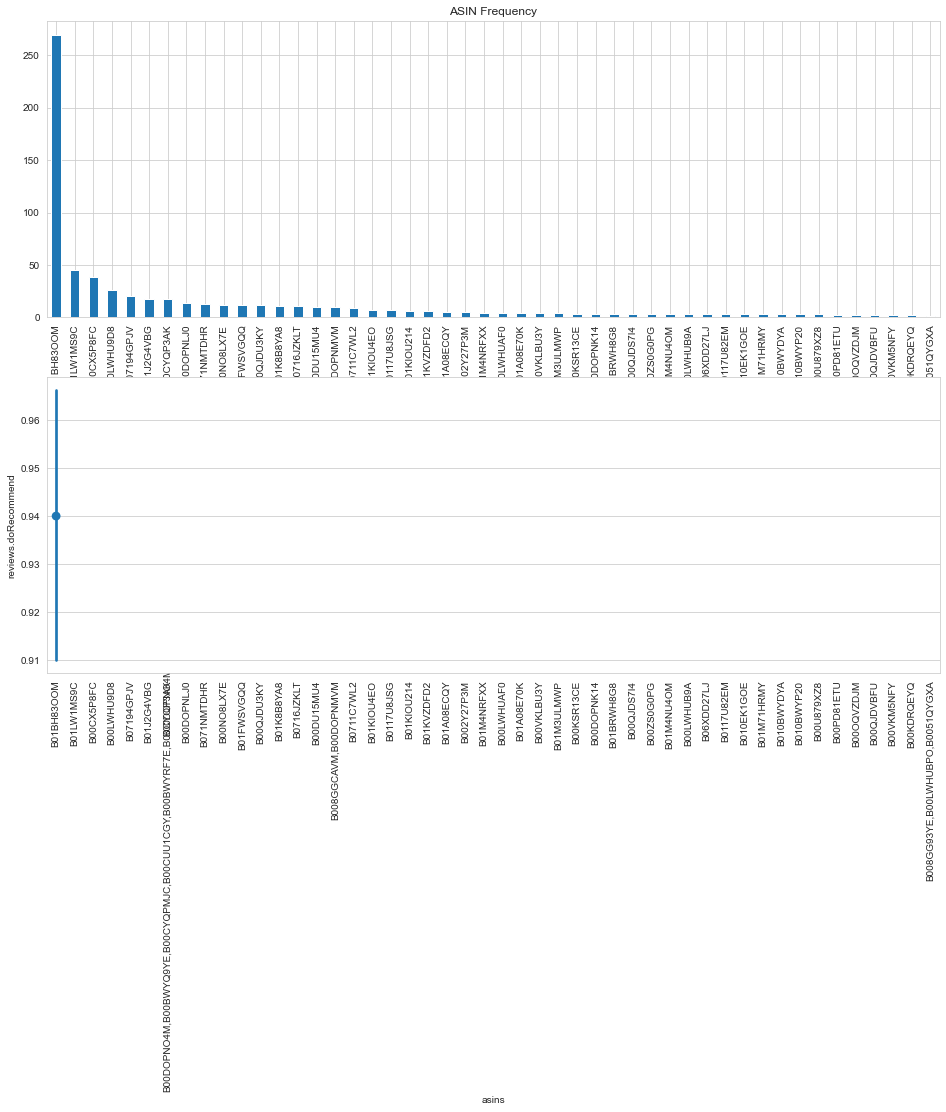

In [25]:
plt.subplots (2,1,figsize=(16,12))
plt.subplot(2,1,1)
reviews["asins"].value_counts().plot(kind="bar", title="ASIN Frequency")
plt.subplot(2,1,2)
sns.pointplot(x="asins", y="reviews.doRecommend", order=asins_count_ix, data=reviews)
plt.xticks(rotation=90)
plt.show()

# 5 Correlations

In [26]:
corr_matrix = reviews.corr()
corr_matrix
# Here we can analyze reviews.ratings with asins

,ean,reviews.numHelpful,reviews.rating,reviews.userCity,reviews.userProvince,sizes,upc
ean,1.000000,NaN,-0.110803,NaN,NaN,NaN,1.000000
reviews.numHelpful,NaN,1.000000,0.000299,NaN,NaN,NaN,NaN
reviews.rating,-0.110803,0.000299,1.000000,NaN,NaN,NaN,-0.110803
reviews.userCity,NaN,NaN,NaN,NaN,NaN,NaN,NaN
reviews.userProvince,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sizes,NaN,NaN,NaN,NaN,NaN,NaN,NaN
upc,1.000000,NaN,-0.110803,NaN,NaN,NaN,1.000000


In [27]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 941 entries, 981 to 65
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    658 non-null    object 
 1   asins                 658 non-null    object 
 2   brand                 658 non-null    object 
 3   categories            658 non-null    object 
 4   colors                295 non-null    object 
 5   dateAdded             658 non-null    object 
 6   dateUpdated           658 non-null    object 
 7   dimension             281 non-null    object 
 8   ean                   334 non-null    float64
 9   keys                  658 non-null    object 
 10  manufacturer          351 non-null    object 
 11  manufacturerNumber    313 non-null    object 
 12  name                  658 non-null    object 
 13  prices                658 non-null    object 
 14  reviews.date          529 non-null    object 
 15  reviews.doRecommend   

In [28]:
counts = reviews["asins"].value_counts().to_frame()
counts.head()

,asins
B01BH83OOM,269
B01LW1MS9C,45
B00CX5P8FC,39
B00LWHU9D8,26
B07194GPJV,20


In [29]:
avg_rating = reviews.groupby("asins")["reviews.rating"].mean().to_frame()
avg_rating.head()

,reviews.rating
asins,
B002Y27P3M,3.800000
"B008GG93YE,B00LWHUBPO,B0051QYGXA",5.000000
"B008GGCAVM,B00DOPNMVM",4.500000
B00CX5P8FC,4.230769
B00DOPNK14,4.333333


In [30]:
table = counts.join(avg_rating)
table.head(30)

,asins,reviews.rating
B01BH83OOM,269,4.579926
B01LW1MS9C,45,4.666667
B00CX5P8FC,39,4.230769
B00LWHU9D8,26,5.000000
B07194GPJV,20,3.650000
B01J2G4VBG,18,4.055556
"B00DOPNO4M,B00BWYQ9YE,B00CYQPMJC,B00CUU1CGY,B00BWYRF7E,B00CYQP3AK",18,4.444444
B00DOPNLJ0,14,3.428571
B071NMTDHR,13,3.692308
B00NO8LX7E,12,4.416667


,asins,reviews.rating
asins,1.000000,-0.011723
reviews.rating,-0.011723,1.000000


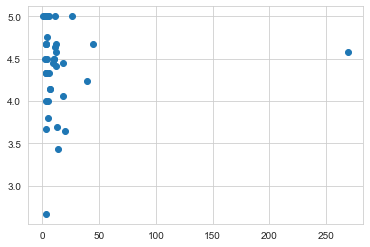

In [31]:
plt.scatter("asins", "reviews.rating", data=table)
table.corr()

# 6 Sentiment Analysis

## 6.1 Set Target Variable (Sentiments)

Segregate ratings from 1-5 into positive, neutral, and negative.

In [32]:
def sentiments(rating):
    if (rating == 5) or (rating == 4):
        return "Positive"
    elif rating == 3:
        return "Neutral"
    elif (rating == 2) or (rating == 1):
        return "Negative"
# Add sentiments to the data
strat_train["Sentiment"] = strat_train["reviews.rating"].apply(sentiments)
strat_test["Sentiment"] = strat_test["reviews.rating"].apply(sentiments)
strat_train["Sentiment"][:20]

981     Positive
740         None
1065    Positive
34          None
349      Neutral
1131    Positive
316         None
228     Positive
343         None
553      Neutral
370     Positive
925     Positive
1176    Positive
267      Neutral
573     Positive
824     Positive
986     Positive
636     Positive
564     Positive
1034    Positive
Name: Sentiment, dtype: object

In [37]:
# Prepare data
X_train = strat_train["reviews.text"]
X_train_targetSentiment = strat_train["Sentiment"]
X_test = strat_test["reviews.text"]
X_test_targetSentiment = strat_test["Sentiment"]
print(len(X_train), len(X_test))

941 236


27,701 training samples and 6926 testing samples.

## 6.2 Extract Features

In [38]:
# Replace "nan" with space
X_train = X_train.fillna(' ')
X_test = X_test.fillna(' ')
X_train_targetSentiment = X_train_targetSentiment.fillna(' ')
X_test_targetSentiment = X_test_targetSentiment.fillna(' ')

# Text preprocessing and occurance counting
from sklearn.feature_extraction.text import CountVectorizer 
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train) 
X_train_counts.shape

(941, 4936)

In [39]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer = TfidfTransformer(use_idf=False)
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
X_train_tfidf.shape

(941, 4936)

## 6.3 Building a Pipeline from the Extracted Features

We will use **Multinominal Naive Bayes** as our Classifier
- Multinominal Niave Bayes is most suitable for word counts where data are typically represented as **word vector counts** (number of times outcome number X[i,j] is observed over the n trials), while also ignoring non-occurrences of a feature i
- Naive Bayes is a simplified version of Bayes Theorem, where all features are assumed conditioned independent to each other (the classifiers), P(x|y) where x is the feature and y is the classifier

In [40]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
clf_multiNB_pipe = Pipeline([("vect", CountVectorizer()), ("tfidf", TfidfTransformer()), ("clf_nominalNB", MultinomialNB())])
clf_multiNB_pipe.fit(X_train, X_train_targetSentiment)

Pipeline(steps=[('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('clf_nominalNB', MultinomialNB())])

## 6.4 Test Model

In [41]:
import numpy as np
predictedMultiNB = clf_multiNB_pipe.predict(X_test)
np.mean(predictedMultiNB == X_test_targetSentiment)

0.5508474576271186

## 6.5 Testing Other Models

**Logistic Regression Classifier**

In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
clf_logReg_pipe = Pipeline([("vect", CountVectorizer()), ("tfidf", TfidfTransformer()), ("clf_logReg", LogisticRegression())])
clf_logReg_pipe.fit(X_train, X_train_targetSentiment)

import numpy as np
predictedLogReg = clf_logReg_pipe.predict(X_test)
np.mean(predictedLogReg == X_test_targetSentiment)

0.8940677966101694

**Support Vector Machine Classifier**

In [43]:
from sklearn.svm import LinearSVC
clf_linearSVC_pipe = Pipeline([("vect", CountVectorizer()), ("tfidf", TfidfTransformer()), ("clf_linearSVC", LinearSVC())])
clf_linearSVC_pipe.fit(X_train, X_train_targetSentiment)

predictedLinearSVC = clf_linearSVC_pipe.predict(X_test)
np.mean(predictedLinearSVC == X_test_targetSentiment)

0.902542372881356

**Decision Tree Classifier**

In [44]:
from sklearn.tree import DecisionTreeClassifier
clf_decisionTree_pipe = Pipeline([("vect", CountVectorizer()), ("tfidf", TfidfTransformer()), 
                                  ("clf_decisionTree", DecisionTreeClassifier())])
clf_decisionTree_pipe.fit(X_train, X_train_targetSentiment)

predictedDecisionTree = clf_decisionTree_pipe.predict(X_test)
np.mean(predictedDecisionTree == X_test_targetSentiment)

0.8516949152542372

**Random Forest Classifier**

In [45]:
from sklearn.ensemble import RandomForestClassifier
clf_randomForest_pipe = Pipeline([("vect", CountVectorizer()), ("tfidf", TfidfTransformer()), ("clf_randomForest", RandomForestClassifier())])
clf_randomForest_pipe.fit(X_train, X_train_targetSentiment)

predictedRandomForest = clf_randomForest_pipe.predict(X_test)
np.mean(predictedRandomForest == X_test_targetSentiment)

0.9067796610169492

### KNN

In [51]:
from sklearn.neighbors import KNeighborsClassifier

In [56]:
clf_KNN_pipe = Pipeline([("vect", CountVectorizer()), ("tfidf", TfidfTransformer()), ("clf_randomForest", KNeighborsClassifier())])
clf_KNN_pipe.fit(X_train, X_train_targetSentiment)

predictedKNN = clf_KNN_pipe.predict(X_test)
np.mean(predictedKNN == X_test_targetSentiment)

0.5296610169491526